<h1>On Galerkin approximations for the QG equations</h1> 
<h2>Supplementary material for subsection on the Eady model</h2>
<p></p>
</h3>Cesar B. Rocha*</h3>
</h3>, William R. Young, and Ian Grooms </h3>
<p></p>
</h4>Winter 2015 </h4>
<p></p>
*Scripps Institution of Oceanography, University of California, San Diego, 9500 Gilman Dr. MC 0213, La Jolla, CA/USA, <crocha@ucsd.edu>




In [104]:
from __future__ import division

import numpy as np
from numpy import pi, sqrt,cos

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.25})
%matplotlib inline

import seaborn as sns
#sns.set(style="darkgrid")
sns.set_context("paper", font_scale=5, rc={"lines.linewidth": 1.5})

### Loading data

We computed and saved the eigenvalue and eigenfunction using Approximation A with $\mathrm{N}=64$ using the linear_eady notebook. We now load the data and plot the wavestructure in the $(x,z)$ plane.

In [105]:
data_path = 'outputs/eady_A_k8_64_efunc.npz'
eady = np.load(data_path)

In [106]:
kappa = eady['kappa']
qn = eady['efunc'] 
N = eady['Nmodes']
cr = eady['c'].real

Seting up the domain grid in $(x,z)$ space

In [107]:
# vertical coordinate
dz = 1./N   # vertical resolution
z = np.arange(-dz/2,-1.-dz/2.,-dz)  # level array 

# horizontal coordinate
x = np.linspace(0,np.pi,100)

# grid
X,Z = np.meshgrid(x,z)

The eigenfunctions are the modal coefficients $\,\breve{q}_n$. We use the standard modes $\mathsf{p}_0 = 1$ and $\mathsf{p}_n = \sqrt{2}\,\cos(n \pi z)$, $n>1$ to compute the eigenstructure in physical space:

\begin{equation}
\hat{q}(z) = \sum_{n=0}^{\mathrm{N}} \breve{q}_n\, \mathsf{p}_n \,\,\,.
\end{equation}

In approximation A, the modal streamfunction $\breve{\psi}_n$ is related to the PV by

\begin{equation}
\breve{\psi}_n = \alpha_n\, \breve{q}_n = - (\kappa^2 + (n \pi)^2)^{-1}\,\,\breve{q}_n\,\,.
\end{equation}

The streamfunction $\hat{\psi}$ is then

\begin{equation}
\hat{q}(z) = \sum_{n=0}^{\mathrm{N}} \breve{q}_n\, \mathsf{p}_n \,.
\end{equation}

\begin{equation}
\hat{\psi}(z) = \sum_{n=0}^{\mathrm{N}} \breve{\psi}_n\, \mathsf{p}_n \,.
\end{equation}


In [108]:
def alpha_n(n,kappa):
    """ Compute the inverse Helmholtz operator in
             Fourier space """
    return -1./( kappa**2 + (n*pi)**2 )

In [109]:
for i in range(N):
    if i == 0 : 
        q = qn[0]*np.ones(z.size)
        psi = qn[0]*np.ones(z.size)*alpha_n(0,kappa)
    else: 
        q+= sqrt(2)*qn[i]*cos(i*pi*z)
        psi+= sqrt(2)*qn[i]*cos(i*pi*z)*alpha_n(i,kappa)

Note that $q$ and $\psi$ are complex. The wavestructure is then

\begin{equation}
\psi(x,z) = |\psi(z)| \exp({ik\,x + P_{\psi}(z)})\,, \qquad \text{and}\qquad q(x,z) = |q(z)|\, \exp({ik\,x + P_{q}(z)}) 
\end{equation}

where vertical bars denote the magnitude and the phases are

\begin{equation}
P_{\psi}(z) = \text{tan$^{-1}$}\frac{\text{Im}(\hat{\psi})}{\text{Re}(\hat{\psi})}\,, \qquad \text{and}\qquad P_{q}(z) = \text{tan$^{-1}$}\frac{\text{Im}(\hat{q})}{\text{Re}(\hat{q})}
\end{equation}

In [100]:
qabs = np.abs(q)
qphase = np.arctan2(q.imag,q.real)
psiabs = np.abs(psi)
psiphase = np.arctan2(psi.imag,psi.real)

In [101]:
qabs = qabs.repeat(x.size).reshape(z.size,x.size)
qphase = qphase.repeat(x.size).reshape(z.size,x.size)
psiabs = psiabs.repeat(x.size).reshape(z.size,x.size)
psiphase = psiphase.repeat(x.size).reshape(z.size,x.size)

In [102]:
PV = qabs*np.cos(kappa*X + qphase)
PSI = psiabs*np.cos(kappa*X + psiphase)

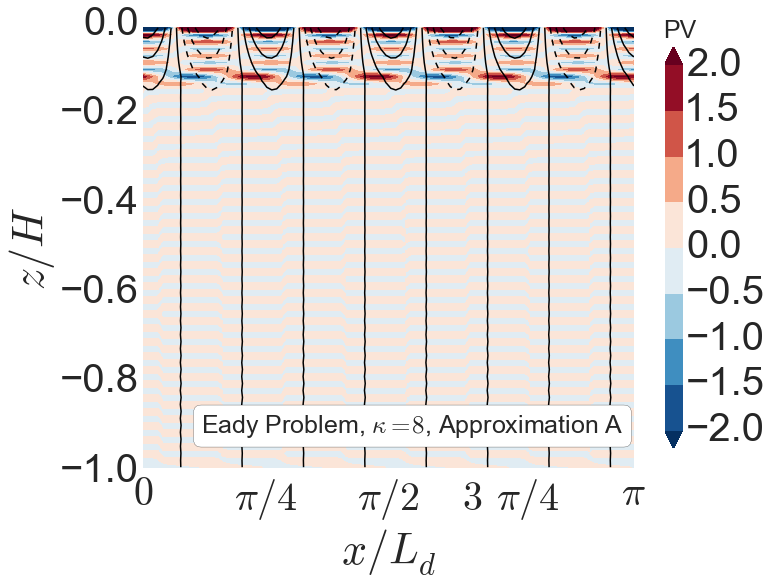

In [103]:
plt.figure(figsize=(11,8))
plt.contour(X,Z,PSI,colors='k')      
plt.contourf(X,Z,PV,np.linspace(-2.,2.,9),cmap='RdBu_r',extend='both') 
#plt.text(-0.325,zc,r' $z_c \rightarrow$',fontsize=25)
cb = plt.colorbar(extend='both',shrink=.9)
cb.ax.text(.0,1.075,'PV',rotation=0,fontsize=25)
plt.text(1.725, -.9, r"Eady Problem, $\kappa = 8$, Approximation A", size=25, rotation=0.,\
            ha="center", va="center",\
            bbox = dict(boxstyle="round",ec='k',fc='w'))
plt.ylim(-1.,0)
plt.xticks([0.,pi/4,pi/2,3*pi/4,pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',\
        r'$3\,\pi/4$',r'$\pi$'])
plt.ylabel('$z/H$')
plt.xlabel(r'$x/L_d$')
#plt.savefig('figs/wave-structure_pv_psi_kappa_8_A_N64.eps')